# MLP Model (Neural Network)

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

## Load Data

In [39]:
X_train = pd.read_csv('../Data/FINAL_SPLIT/Football-Training-2010_2025_ONEHOT_train.csv')
X_test  = pd.read_csv('../Data/FINAL_SPLIT/Football-Training-2010_2025_ONEHOT_test.csv')

y_train = pd.read_csv('../Data/FINAL_SPLIT/PL_dataset_2010-2025_train.csv')['MatchResult']
y_test  = pd.read_csv('../Data/FINAL_SPLIT/PL_dataset_2010-2025_test.csv')['MatchResult']

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Train Model

In [33]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(3, activation='softmax')
])

/Users/poomk/anaconda3/envs/FYP_ML_NN/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile(
    optimizer=Adam(learning_rate=0.005),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [35]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4243 - loss: 1.4847 - val_accuracy: 0.5883 - val_loss: 1.0575
Epoch 2/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5393 - loss: 1.0890 - val_accuracy: 0.6346 - val_loss: 0.9668
Epoch 3/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6246 - loss: 0.9501 - val_accuracy: 0.6484 - val_loss: 0.9405
Epoch 4/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6453 - loss: 0.9236 - val_accuracy: 0.6449 - val_loss: 0.9287
Epoch 5/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6296 - loss: 0.9205 - val_accuracy: 0.6672 - val_loss: 0.9065
Epoch 6/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6356 - loss: 0.8916 - val_accuracy: 0.6415 - val_loss: 0.9150
Epoch 7/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - accuracy: 0.6687 - loss: 0.8485 - val_accuracy: 0.6432 - val_loss: 0.9096
Epoch 8/100
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.6722 - loss: 0.8406 - val_accuracy: 0.6329

In [14]:
model.save("saved_models_result/mlp_result_model.h5")

import pickle
with open("saved_models_result/mlp_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

## Test Model

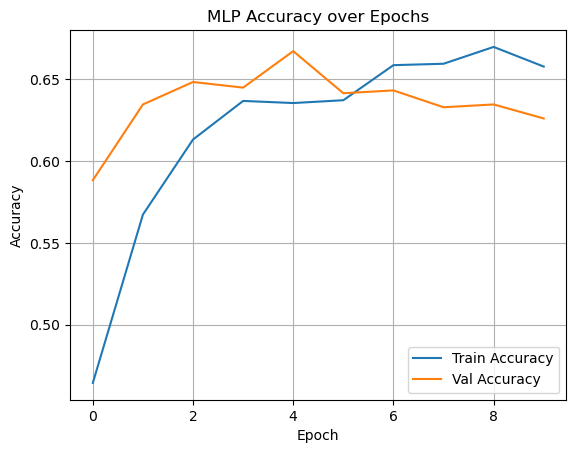

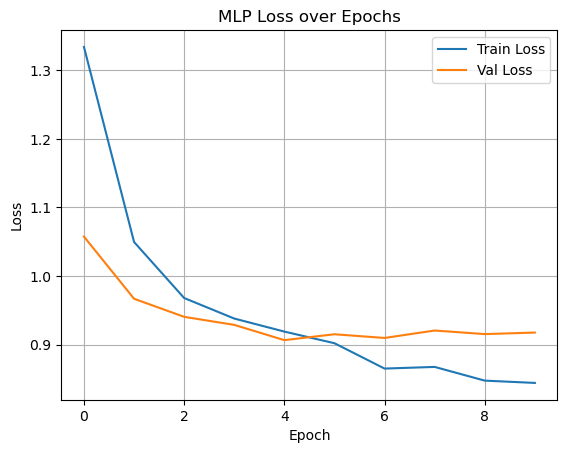

In [36]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("MLP Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MLP Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [37]:
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [38]:
print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred_classes):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes, target_names=["Home Win", "Draw", "Away Win"]))
print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_classes))


Test Accuracy: 0.6099

Classification Report:

              precision    recall  f1-score   support

    Home Win       0.66      0.82      0.73       316
        Draw       0.29      0.06      0.10       163
    Away Win       0.57      0.71      0.63       226

    accuracy                           0.61       705
   macro avg       0.51      0.53      0.49       705
weighted avg       0.55      0.61      0.56       705

Confusion Matrix:

[[260  11  45]
 [ 79  10  74]
 [ 53  13 160]]
